<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/J078_Remedial_Assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Remedial Assignment No : 2

#Roll No: J078

##Thyroid-new Classification Problem


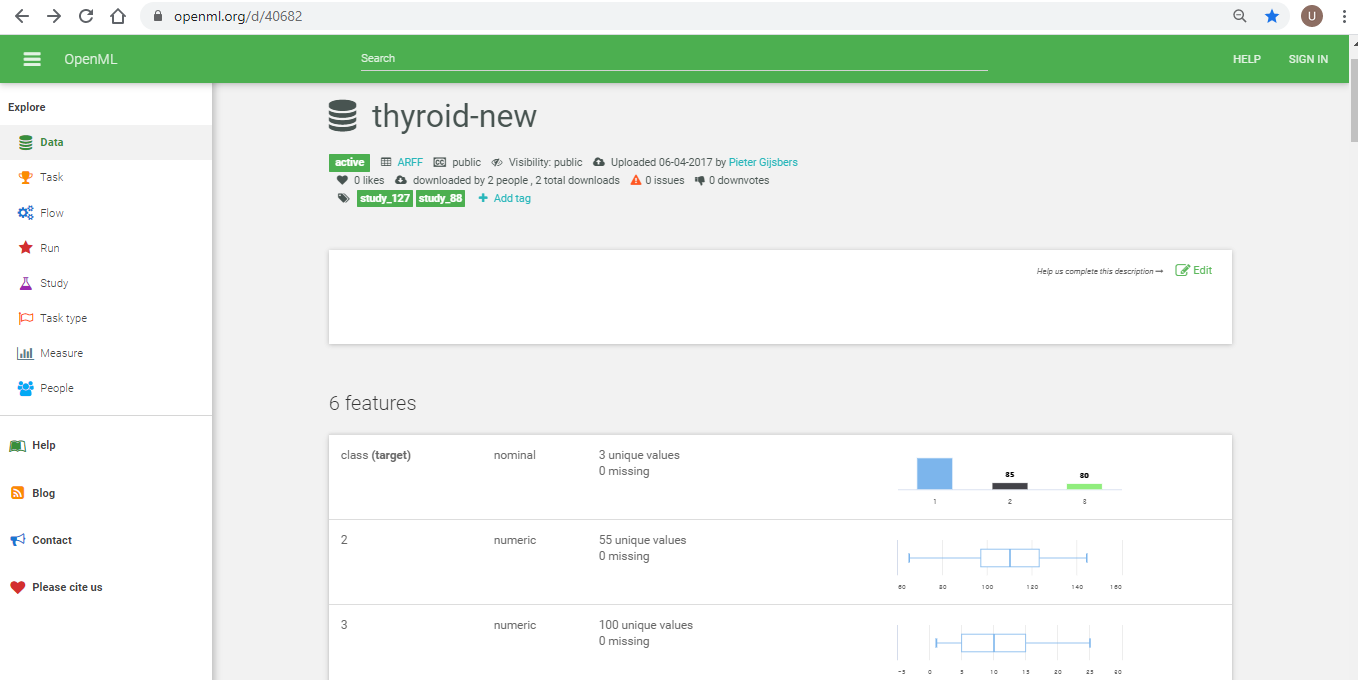

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/new-thyroid.csv")
data.head()

,2,3,4,5,6,class
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [3]:
data.isnull().sum()

2        0
3        0
4        0
5        0
6        0
class    0
dtype: int64

No missing value is there

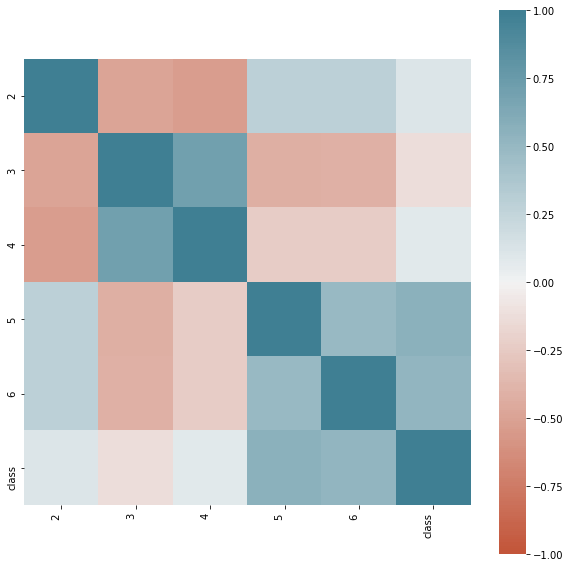

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

As no feature is highly correlated with the Class(Target Varaible) .....Hence will keep as  the features in the model

In [5]:
y=data.pop("class")
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [6]:
X=data
X.head()

,2,3,4,5,6
0,107,10.1,2.2,0.9,2.7
1,113,9.9,3.1,2.0,5.9
2,127,12.9,2.4,1.4,0.6
3,109,5.3,1.6,1.4,1.5
4,105,7.3,1.5,1.5,-0.1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(X)
X_stand=pd.DataFrame(X_stand)
X_stand.head()

,0,1,2,3,4
0,-0.197894,0.063022,0.105754,-0.324389,-0.186180
1,0.259603,0.020346,0.741266,-0.144173,0.211250
2,1.327096,0.660493,0.246979,-0.242472,-0.446993
3,-0.045395,-0.961213,-0.317920,-0.242472,-0.335216
4,-0.350393,-0.534448,-0.388533,-0.226089,-0.533931


In [8]:
import numpy as np

In [9]:
Y = pd.get_dummies(y)
Y

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
210,0,0,1
211,0,0,1
212,0,0,1
213,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
seed=16
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (172, 5)
X_test Shape:  (43, 5)
y_train Shape:  (172, 3)
y_test Shape:  (43, 3)


In [11]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

initializer = keras.initializers.glorot_normal()
filepath = "Remedial_Assign2_Model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, min_delta=0.01, baseline=0.99)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(512,activation="relu",input_shape=(5,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(Dropout(0.5))
model1.add(layers.Dense(256,activation="relu", kernel_initializer=initializer, bias_initializer=initializer))
model1.add(Dropout(0.5))
model1.add(layers.Dense(128,activation="relu", kernel_initializer=initializer, bias_initializer=initializer))
model1.add(Dropout(0.5))
model1.add(layers.Dense(3,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3072      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [12]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model1.fit(X_train, y_train, epochs=150,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/150
1/5 [=====>........................] - ETA: 0s - loss: 1.6910 - accuracy: 0.2188
Epoch 00001: val_accuracy improved from -inf to 0.20000, saving model to Remedial_Assign2_Model.hdf5
5/5 [==============================] - 0s 45ms/step - loss: 1.6747 - accuracy: 0.1533 - val_loss: 1.3060 - val_accuracy: 0.2000
Epoch 2/150
1/5 [=====>........................] - ETA: 0s - loss: 1.2282 - accuracy: 0.2812
Epoch 00002: val_accuracy improved from 0.20000 to 0.42857, saving model to Remedial_Assign2_Model.hdf5
5/5 [==============================] - 0s 12ms/step - loss: 1.2419 - accuracy: 0.2190 - val_loss: 0.9378 - val_accuracy: 0.4286
Epoch 3/150
1/5 [=====>........................] - ETA: 0s - loss: 1.0085 - accuracy: 0.3438
Epoch 00003: val_accuracy improved from 0.42857 to 0.82857, saving model to Remedial_Assign2_Model.hdf5
5/5 [==============================] - 0s 11ms/step - loss: 0.9308 - accuracy: 0.4964 - val_loss: 0.6264 - val_accuracy: 0.8286
Epoch 4/150
1/5 [=====>.....

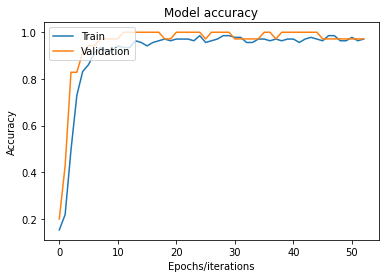

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

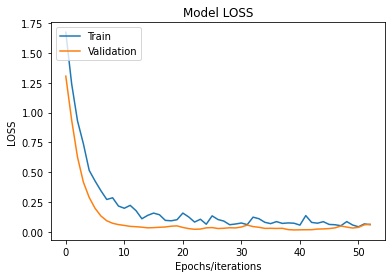

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("LOSS")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [16]:
from keras.models import load_model
saved_model = load_model('Remedial_Assign2_Model.hdf5')
test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss))

Test Accuracy: 0.95348835
Test Loss: 0.152


Test Accuracy:  0.95348835

Test Loss: 0.152

Accuracy coming around ~ 100% in Training,

Validation & Testing Dataset ~98%


Plot of accuracy of Train & Validation done above

Callback is used here to save the improved model.

Hyper-Parameter used here are:

1)Made 1st Layer of Relu Activation and the input dimension = 5 as 5 variables in dataset.

2)Added next 3 layers and output layers as nodes=3 as 3 classes in dataset

3)Have added a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='categorical_crossentropy' as it has 3 different classes

7)Callbackused are: earlystopping, modelcheckpoint.

8)Epoch=150



---



---

